# Import

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib
from datetime import date, timedelta, datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

##Similar to analysis.ipynb, just using a dataset that only include 2017 onwards data

In [ ]:
resale = pd.read_csv("resale-flat-prices/resale(2017).csv", parse_dates=["month", "lease_commence_date"])
def storey_num(s):
    a = int(s[:2])
    b = int(s[-2:])
    return int((a+b)/2)
resale['storey_coded'] = resale.storey_range.map(storey_num)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_years,storey_coded,district,Region,addr,lat,long,nearby_mrt,nearby_park,nearby_school,nearby_hawker,nearby_supermarket,count_nearby_mrt,count_nearby_hawker,count_nearby_park,count_nearby_school,count_nearby_supermarket
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,improved,1979-01-01,232000.0,13880 days,60.932120,11,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.85388,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,3,2,2,3
1,2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,improved,1979-01-01,235000.0,14000 days,60.603572,11,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.85388,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,3,2,2,3
2,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,improved,1979-01-01,202000.0,14304 days,59.771248,2,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.85388,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,3,2,2,3
3,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,improved,1979-01-01,210000.0,14304 days,59.771248,2,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.85388,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,3,2,2,3
4,2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,improved,1979-01-01,220000.0,14365 days,59.604236,8,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.85388,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,3,2,2,3


In [ ]:
eda_df = resale[["month", "flat_type", "floor_area_sqm", "lease_commence_date", "remaining_years", 
                 "storey_coded", "Region", "town", "resale_price", "count_nearby_mrt", "count_nearby_hawker", 
                 "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]]

# Variable/Predictor Analysis

In [ ]:
eda_df.head()

,month,flat_type,floor_area_sqm,lease_commence_date,remaining_years,storey_coded,Region,town,resale_price,count_nearby_mrt,count_nearby_hawker,count_nearby_park,count_nearby_school,count_nearby_supermarket
0,2017-01-01,2 ROOM,44.0,1979-01-01,60.932120,11,RCR,ANG MO KIO,232000.0,0,3,2,2,3
1,2017-05-01,2 ROOM,44.0,1979-01-01,60.603572,11,RCR,ANG MO KIO,235000.0,0,3,2,2,3
2,2018-03-01,2 ROOM,44.0,1979-01-01,59.771248,2,RCR,ANG MO KIO,202000.0,0,3,2,2,3
3,2018-03-01,2 ROOM,44.0,1979-01-01,59.771248,2,RCR,ANG MO KIO,210000.0,0,3,2,2,3
4,2018-05-01,2 ROOM,44.0,1979-01-01,59.604236,8,RCR,ANG MO KIO,220000.0,0,3,2,2,3


## Variable distribution

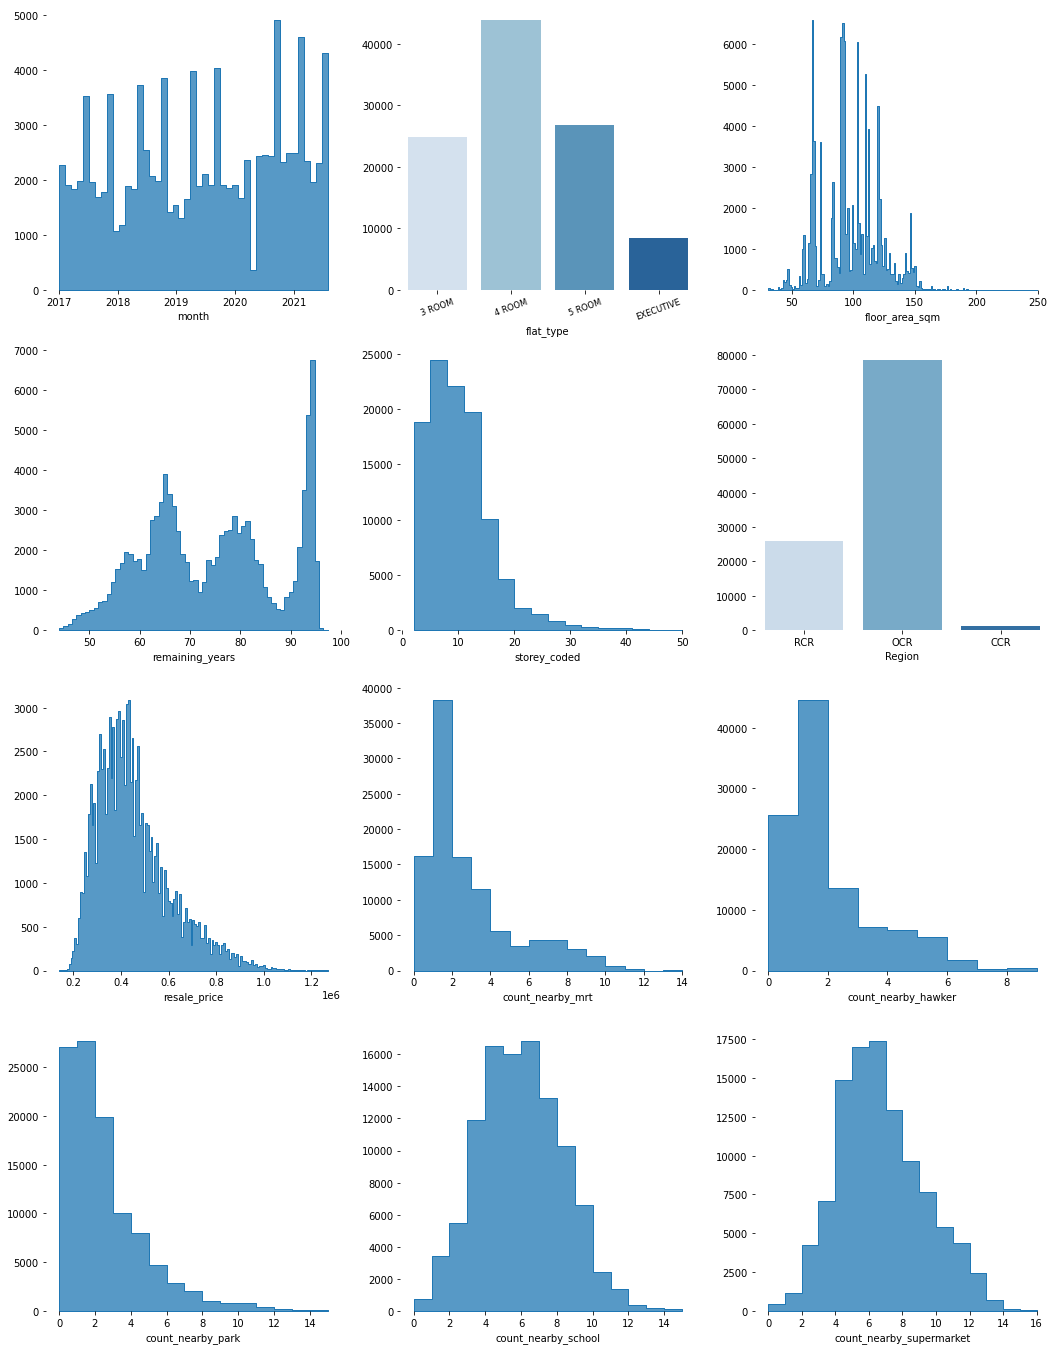

In [ ]:
col_names = ["month", "flat_type", "floor_area_sqm", "remaining_years", 
            "storey_coded", "Region", "resale_price", "count_nearby_mrt", "count_nearby_hawker", 
            "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]
dm = 0
fig, axes = plt.subplots(4, 3, figsize = [18,24])
for col in col_names:
    if col == "flat_type":
        lst = ["3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]
        sns.countplot(ax = axes[dm//3, dm%3], x = eda_df[col], palette = "Blues", order = lst)
    elif col == "Region":
        sns.countplot(ax = axes[dm//3, dm%3], x = eda_df[col], palette = "Blues")
    elif "count" in col or col == "storey_coded":
        lst = sorted(list(set(eda_df[col])))
        sns.histplot(ax = axes[dm//3, dm%3], x = eda_df[col], element="step", bins = lst)
    else:
        sns.histplot(ax = axes[dm//3, dm%3], x = eda_df[col], element="step")
    axes[dm//3][dm%3].set_ylabel('') 
    dm += 1
axes[0][1].tick_params(axis='x', rotation=20, labelsize = "small")

sns.despine(left=True, bottom=True)

## Correlation with price

Used only recent 5 years - reduce the impact of general price changes

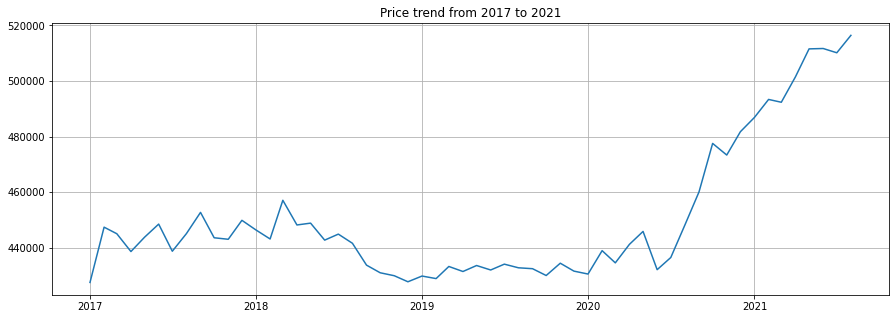

In [ ]:
fig, ax = plt.subplots(figsize = [15,5])
df_month = eda_df.groupby(by=['month']).agg('mean')
df_month = df_month[["resale_price"]].reset_index()
plt.plot(df_month.month, df_month.resale_price)
plt.title("Price trend from 2017 to 2021")
plt.grid()

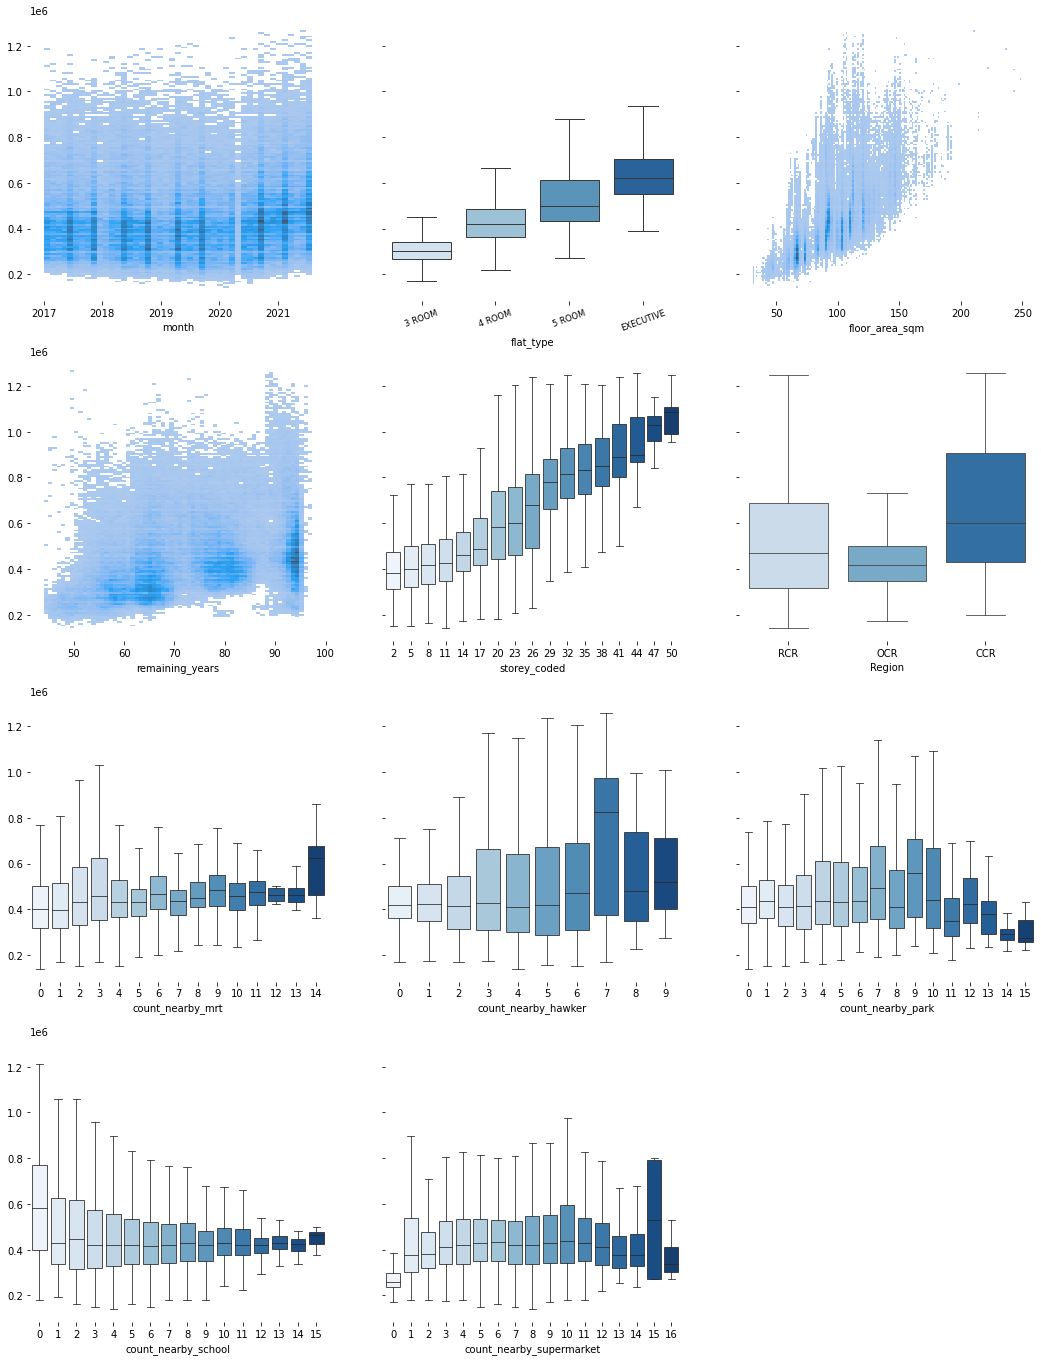

In [ ]:
dm = 0
fig, axes = plt.subplots(4, 3, figsize = [18,24], sharey = True)
col_names = ["month", "flat_type", "floor_area_sqm", "remaining_years", 
            "storey_coded", "Region", "count_nearby_mrt", "count_nearby_hawker", 
            "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]
for col in col_names:
    if col == "flat_type":
        lst = ["3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]
        sns.boxplot(ax = axes[dm//3, dm%3], x = eda_df[col], y = eda_df.resale_price, 
                    palette = "Blues", order = lst, showfliers = False, linewidth = 1)
    elif "count" in col or col == "storey_coded" or col == "Region":
        sns.boxplot(ax = axes[dm//3, dm%3], x = eda_df[col], y = eda_df.resale_price, 
                    palette = "Blues", showfliers = False, linewidth = 0.8)
    else:
        sns.histplot(ax = axes[dm//3, dm%3], x = eda_df[col], y = eda_df.resale_price)
    axes[dm//3][dm%3].set_ylabel('') 
    dm += 1
axes[0][1].tick_params(axis='x', rotation=20, labelsize = "small")
fig.delaxes(axes[3][2])
sns.despine(left=True, bottom=True)
# fig.savefig('2017_cor.png', transparent=True)

/Users/zhouentong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


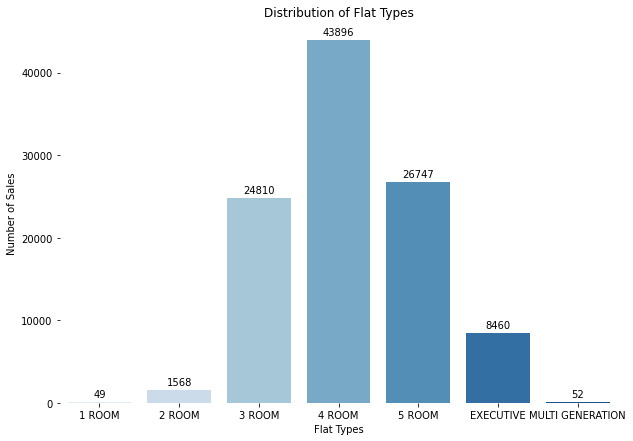

In [ ]:
fig, ax = plt.subplots(figsize = [10,7])


lst = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI GENERATION"]
ax = sns.countplot(eda_df.flat_type, palette = "Blues", order = lst, linewidth = 1)
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Types')
plt.ylabel('Number of Sales')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+600), ha="center")

#ax.tick_params(axis='x', rotation=20, labelsize = "small")
sns.despine(left=True, bottom=True)
# fig.savefig('7types.png', transparent=True)

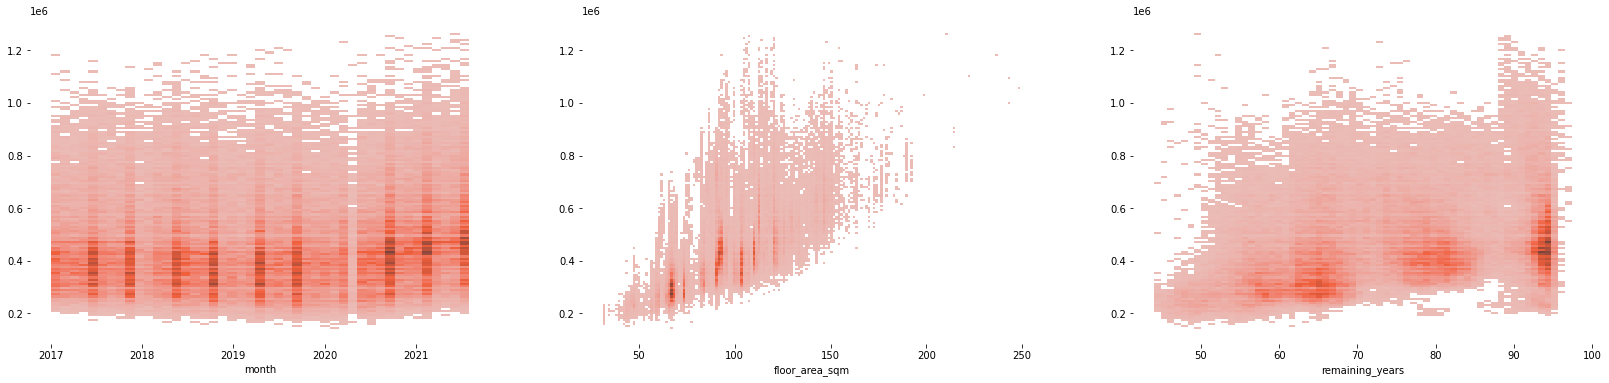

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = [28,6])

colors = ["#f0603c", "#8bc7c2"]
# colors = ["#f0603c","#d77a5e","#be947f","#a5aea1","#8bc7c2"]
customPalette = sns.set_palette(sns.color_palette(colors))

col_names = ["month", "floor_area_sqm", "remaining_years"]
dm=0
for col in col_names:
    sns.histplot(ax = axes[dm], x = eda_df[col], y = eda_df.resale_price, palette = "dark:salmon_r")
    axes[dm].set_ylabel('') 
    dm += 1

#ax.tick_params(axis='x', rotation=20, labelsize = "small")
sns.despine(left=True, bottom=True)
fig.savefig('vsprice.png', transparent=True)

## Correlation across variables

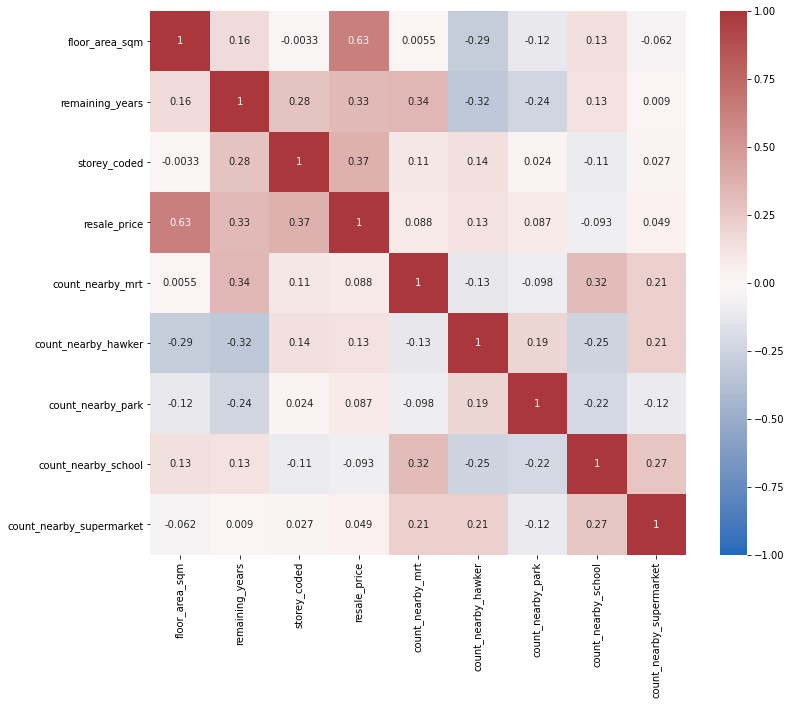

In [ ]:
fig, ax = plt.subplots(figsize = [12,10])
correlation_mat = eda_df.corr()
sns.heatmap(correlation_mat, annot = True, vmin=-1, vmax=1, cmap = "vlag")
plt.show()

No handles with labels found to put in legend.


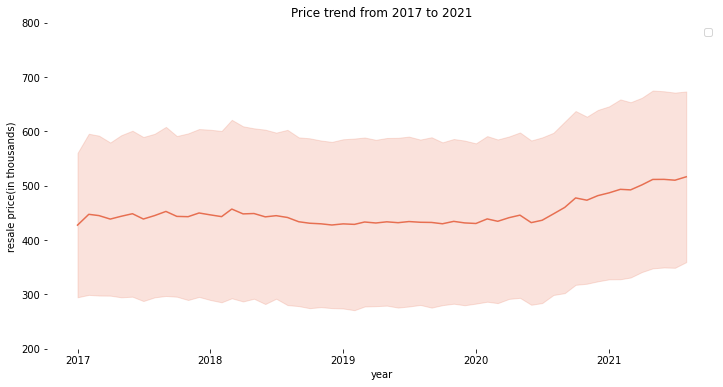

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
#pal = ["#d2d4c9","#c2b8a1","#b29f7f","#68a0aa","#2f95bb","#496481","#1c223d"]
pal = ["#23404b","#264653","#287271","#2a9d8f","#8ab17d","#babb74","#e9c46a","#f4a261","#e76f51"]

sns.lineplot(x=eda_df["month"],#.apply(lambda date: date.toordinal()), 
            y=eda_df.resale_price/1000, 
            color = pal[-1], ci = "sd")

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousands)', ylim = [200, 800])
plt.title('Price trend from 2017 to 2021')
sns.despine(left=True, bottom=True)


# Time Series Analysis

## Price trend with different flat types

<ipython-input-12-5ea0685111ea>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


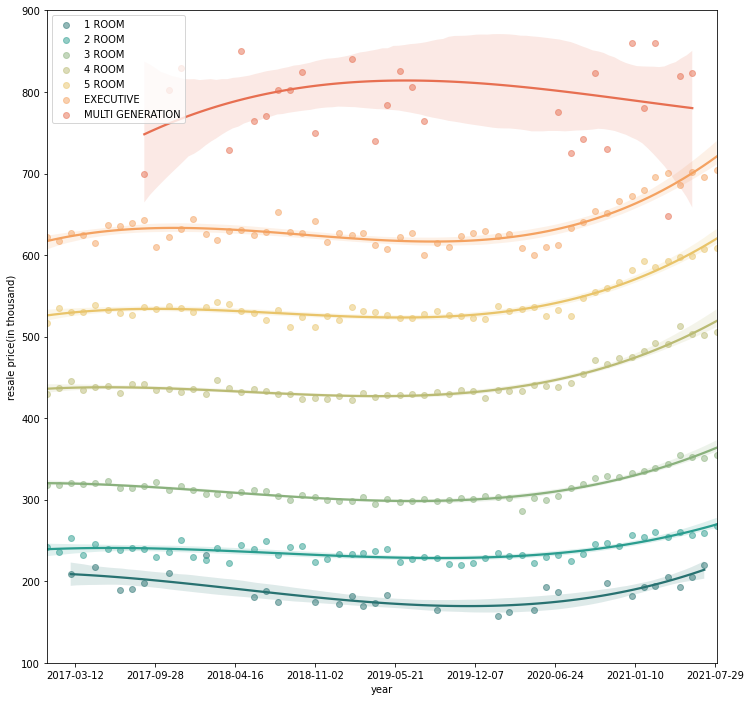

In [ ]:
eda_df_flat = eda_df.groupby(by=['month', "flat_type"]).agg('mean')
eda_df_flat = eda_df_flat[["resale_price"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))
#pal = ["#d2d4c9","#c2b8a1","#b29f7f","#68a0aa","#2f95bb","#496481","#1c223d"]
pal = ["#23404b","#264653","#287271","#2a9d8f","#8ab17d","#babb74","#e9c46a","#f4a261","#e76f51"]
for i,col in enumerate(eda_df_flat.columns[1:]):
    sns.regplot(x=eda_df_flat["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_flat[col]/1000, 
                label = eda_df_flat.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 3, 
                color = pal[i+2])

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)', ylim = [100, 900])
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

### Price per sqm

<ipython-input-13-64ffe0957be9>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


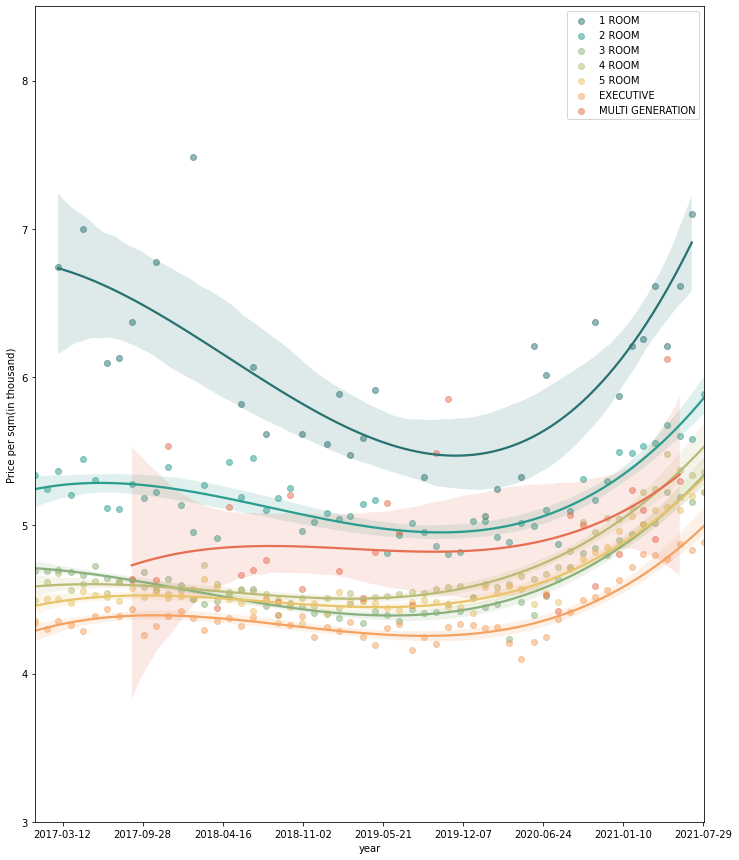

In [ ]:
temp = eda_df.copy()
temp["price_per_sqm"] = temp.resale_price / temp.floor_area_sqm
temp.groupby(by=['month', "flat_type"]).agg('mean')
eda_df_pps = eda_df.copy()
eda_df_pps["price_per_sqm"] = eda_df_pps.resale_price / eda_df_pps.floor_area_sqm
eda_df_pps = eda_df_pps.groupby(by=['month', "flat_type"]).agg('mean')
eda_df_pps = eda_df_pps[["price_per_sqm"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 15))
#pal = ["#d2d4c9","#c2b8a1","#b29f7f","#68a0aa","#2f95bb","#496481","#1c223d"]
pal = ["#23404b","#264653","#287271","#2a9d8f","#8ab17d","#babb74","#e9c46a","#f4a261","#e76f51"]
for i,col in enumerate(eda_df_pps.columns[1:]):
    sns.regplot(x=eda_df_pps["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_pps[col]/1000, 
                label = eda_df_pps.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 3, 
                color = pal[i+2])

ax.legend()
ax.set(xlabel='year', ylabel='Price per sqm(in thousand)', ylim = [3, 8.5])
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

## Price trend for different storey

Higher floor, higher price

<ipython-input-14-a1a8a5df329e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


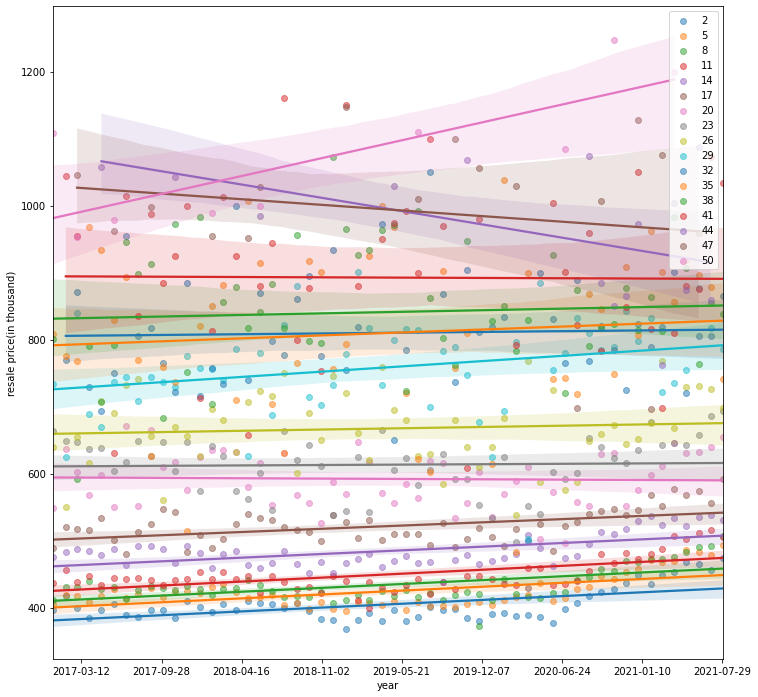

In [ ]:
eda_df_storey = eda_df.groupby(by=['month', "storey_coded"]).agg('mean')

eda_df_storey = eda_df_storey[["resale_price"]].unstack().reset_index()

### PLOT BUILD
#pal = ["#76c4c4","#5db3c9","#53afc9","#49a9c9","#458ab5","#44729e","#40608a","#3c5780","#3b5077"]
#pal = ["#c3a3d8","#97a4de","#6ba5e4","#5b85bd","#4a6596","#35426d","#201e44","#1c0f31","#17001d"]
#fig, ax = plt.subplots(7, 1, figsize=(10,20))
fig, ax = plt.subplots(figsize=(12, 12))
for i,col in enumerate(eda_df_storey.columns[1:]):
    sns.regplot(x=eda_df_storey["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_storey[col]/1000, 
                label = eda_df_storey.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 1)#, 
                #color = pal[i])

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

## Price trend by town

Can select a few interesting towns

<ipython-input-15-3be6a50e90e6>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


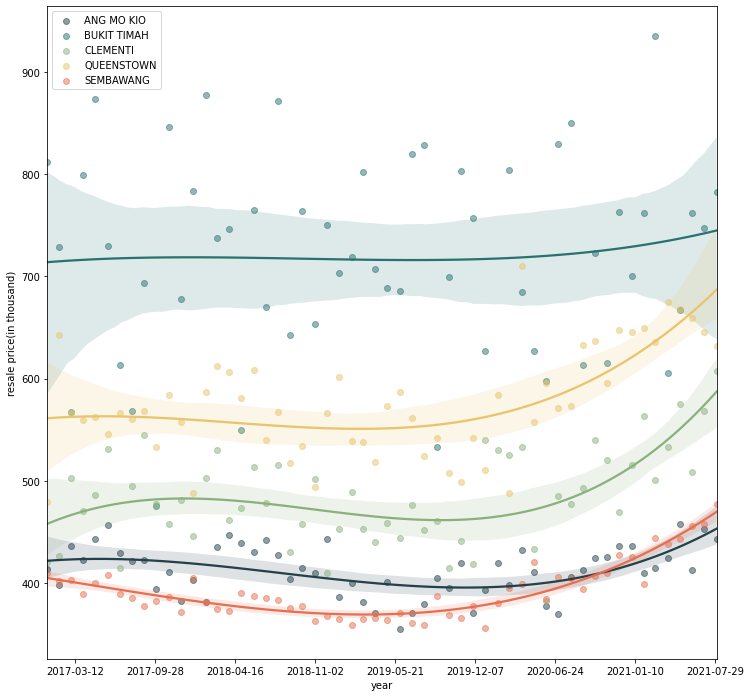

In [ ]:
eda_df_town = eda_df.groupby(by=['month', "town"]).agg('mean')
eda_df_town = eda_df_town[["resale_price"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))
towns = ["BUKIT TIMAH", "ANG MO KIO", "QUEENSTOWN", "SEMBAWANG", "CLEMENTI", "SEMBAWANG"]
k = 0
for i,col in enumerate(eda_df_town.columns[1:]):
    if col[1] not in towns:
        continue
    sns.regplot(x=eda_df_town["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_town[col]/1000, 
                label = eda_df_town.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 3, 
                color = pal[k*2])
    k += 1

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

## Price trend by region

OCR and RCR price is going up

<ipython-input-16-ffcb3dfe14a9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


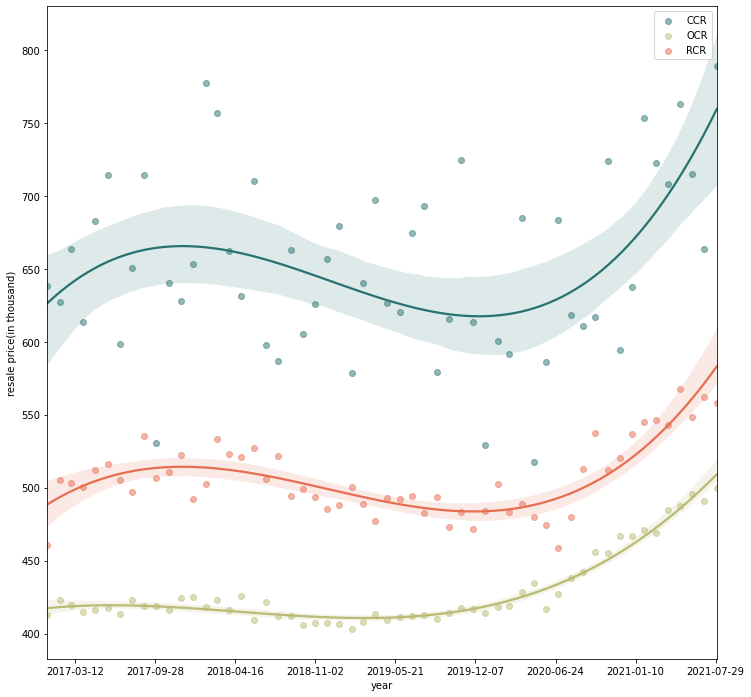

In [ ]:
eda_df_region = eda_df.groupby(by=['month', "Region"]).agg('mean')
eda_df_region = eda_df_region[["resale_price"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))

for i,col in enumerate(eda_df_region.columns[1:]):
    sns.regplot(x=eda_df_region["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_region[col]/1000, 
                label = eda_df_region.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 3, 
                color = pal[i*3+2])

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()